In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued
### C2C Jordan Armstrong
#### Documentation: None.

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: 

Null hypothesis: The lady cannot tell the difference between the teas beyond randomness.

Alternate hypothesis: The lady can tell the difference between the teas beyond randomness.

Step 2: Test statistic

X: number of times she correctly picked tea first. 

Hypergeometric distriubtion: binomial distribution without replacement.

$x_{obs}=3$

If $H_0$ were true, then $X$ ~ Hypergeom$(M=8, n=4, N=4)$

Step 3: ...

In [9]:
M,n,N=8,4,4
stats.hypergeom.rvs(M,n,N,size=10)

array([1, 1, 2, 2, 2, 2, 3, 1, 1, 1])

In [13]:
print(stats.hypergeom.pmf([3,4],M,n,N).sum())
print(1-stats.hypergeom.cdf(2,M,n,N))

0.24285714285714263
0.24285714285714288


Step 4: 
We fail to reject the null hypothesis. That is we fail to disprove her being able to predict with any consistency beyond randomness. 

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [14]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1:

Null hypothesis: Equal mean sepal width between the virginica species and the versicolor species.

Alternatre hypothesis: Virginica species has a larger mean sepal width than the versicolor species.

Step 2: Test Statistic

X: Difference in sample means (Virginica-versicolor)

$X_{obs}=0.204$

If null hypothesis were true, the expected diffence would be $0$.

Step 3: ...

We don't know what the distribution is, it is normally distributed but we don't know the scaling of the x-axis. Thus we have to use simulation, a permutation test. 

In [16]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [19]:
num_obs=iris_sub.num_rows
test_stat=[]
for _ in np.arange(10000):
    iris_sample=iris_sub.with_column("sampled", iris_sub.sample(num_obs, with_replacement=False).column(1))
    test_stat=np.append(test_stat, np.diff(iris_sample.group(0,np.mean).column(2))[0])
                

Step 4: ...

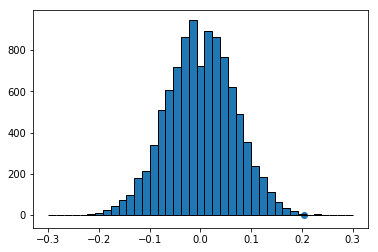

In [29]:
binspace=np.linspace(-0.3,0.3,40)
plt.hist(test_stat, bins=binspace)
plt.scatter(obs,0)
plt.show()

In [28]:
np.mean(test_stat>=obs)

0.0007

We reject the null hypothesis of the species having equal means, in favor of the virginica having a larger mean than versicolor.